# Regression

Das Ziel der Regressionsanalyse ist es, Beziehungen zwischen Variablen zu finden. {numref}`fig-regression-example` zeigt ein Beispiel für die Beziehung von zwei Eigenschaften von Fahrzeugen mit Verbrennungsmotor: dem Spritverbrauch und der Höchstgeschwindigkeit. In der Regel haben Fahrzeuge mit einer höheren Höchstgeschwindigkeit auch einen höheren Spritverbrauch. Mit einer Regression kann man diesen Zusammenhang basierend auf einer Stichprobe modellieren.

```{figure} images/regression_example_german.png
---
width: 600px
name: fig-regression-example
---
Beziehung von Spritverbrauch und Höchstgeschwindigkeit
```

Etwas allgemeiner kann man Regression wie in Fig. 8.2 darstellen. Wir haben Instanzen, deren Merkmale wir kennen. Bei der Regression spricht man statt von Merkmalen auch von *unabhängigen Variablen*. Durch die Regression versucht man, die Beziehung von den Merkmalen zu einer *abhängigen Variablen* herzustellen, also dem Wert, an dem wir interessiert sind. In {numref}`fig-regression-concept` haben wir ein Merkmal $x$ und eine abhängige Variable $y$. Durch die Regression wird beschrieben, wie sich $y$ verändert, wenn sich $x$ verändert. Das Beispiel zeigt eine *lineare Regression*, also die Regression von $y$ durch eine lineare Abbildung, was in zwei Dimensionen einer Geraden entspricht.

```{figure} images/regression_concept_german.png
---
width: 600px
name: fig-regression-concept
---
Beziehung von Spritverbrauch und Höchstgeschwindigkeit
```

Formal haben wir eine Menge von Objekten $O = \{object_1, object_2, ...\}$, die möglicherweise unendlich viele Elemente enthält. Außerdem haben wir eine Repräsentation der Objekte als Instanzen im Merkmalsraum $\mathcal{F} = \{\phi(o): o \in O\}$, wobei wir von numerischen Merkmalen ausgehen, also $\mathcal{F} \subseteq \mathbb{R}^m$. Für jedes Objekt kennen wir außerdem die abhängige Variable $f^*(o) = y \in \mathbb{R}$. Das Ziel der Regression ist es, eine Regressionsfunktion

$$f: \mathcal{F} \to \mathbb{R}$$

zu bestimmen, sodass $f(\phi(o)) \approx f^*(o)$. Die Regressionsfunktion $f$ wird auch einfach Regression von $y$ genannt. Die Problemstellung der Regression ist also ähnlich zur Klassifikation, nur dass es keine fest definierten Klassen gibt, sondern stattdessen ein numerischer Wert basierend auf den Merkmalen vorhergesagt werden soll.

## Güte von Regressionen

Ähnlich wie bei der Klassifikation ist die Bewertung der Güte ein wichtiges Kriterium, um eine gute Regressionsfunktion für eine abhängige Variable zu bestimmen. Wir diskutieren die Güte einer linearen Regression anhand von zwei Beispielen.

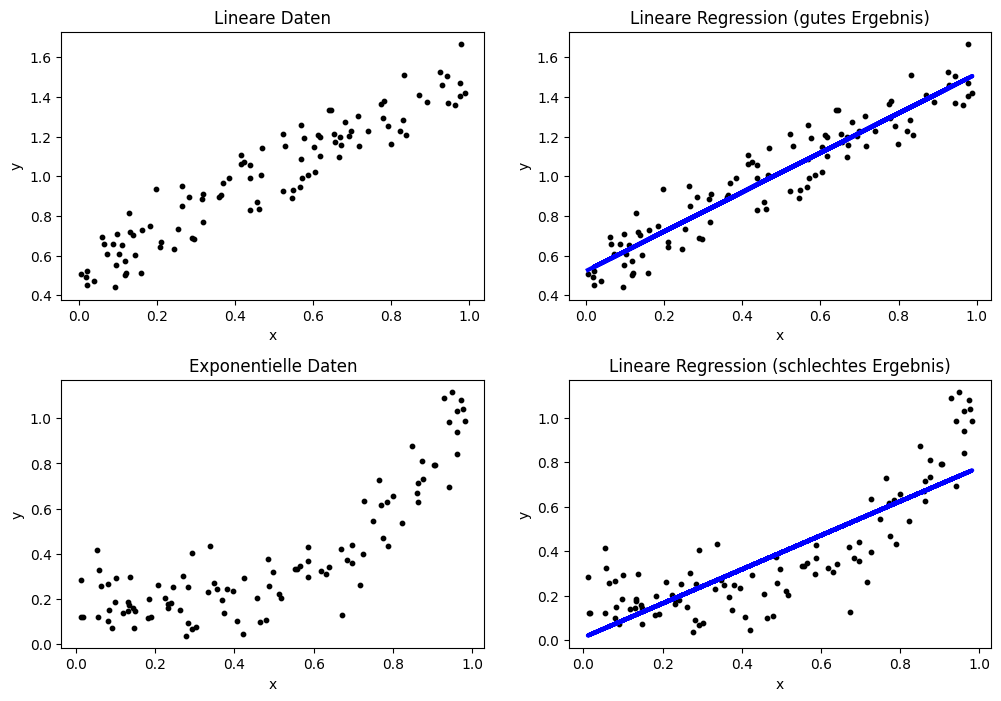

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(seed=0)
n = 100

# Linear data
X_lin = np.random.rand(n, 1)
Y_lin = X_lin+np.random.randn(n, 1)*0.1+0.5

# Train and predict
regr_lin = LinearRegression()
regr_lin.fit(X_lin, Y_lin)
Y_lin_pred = regr_lin.predict(X_lin)

# Exponential data
X_exp = np.random.rand(n, 1)
Y_exp = X_exp**4+np.random.randn(n, 1)*0.1+0.19

# Train and predict
regr_lin = LinearRegression()
regr_lin.fit(X_exp, Y_exp)
Y_exp_pred = regr_lin.predict(X_exp)

# Scatterplot
f, axes = plt.subplots(2, 2, figsize=(12, 7))

axes[0, 0].set_title('Lineare Daten')
axes[0, 0].scatter(X_lin, Y_lin,  color='black', s=10)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')

axes[0, 1].set_title('Lineare Regression (gutes Ergebnis)')
axes[0, 1].scatter(X_lin, Y_lin,  color='black', s=10)
axes[0, 1].plot(X_lin, Y_lin_pred, color='blue', linewidth=3)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')

axes[1, 0].set_title('Exponentielle Daten')
axes[1, 0].scatter(X_exp, Y_exp,  color='black', s=10)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')

axes[1, 1].set_title('Lineare Regression (schlechtes Ergebnis)')
axes[1, 1].scatter(X_exp, Y_exp,  color='black', s=10)
axes[1, 1].plot(X_exp, Y_exp_pred, color='blue', linewidth=3)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Das erste Beispiel zeigt eine Regression, bei der die blaue Regressionsgerade sehr gut zu den Daten passt. Dies ist auch nicht verwunderlich, da wir die Daten mithilfe einer linearen Funktion generiert haben. Im zweiten Beispiel sieht man eine schlechte Regression, da die Regressionsgerade nicht gut zur eigentlichen Form der Daten passt. Auch dies ist nicht überraschend, da wir die Daten mithilfe der Exponentialfunktion generiert haben. Im Folgenden nennen wir das erste Beispiel einfach nur noch das "gute Ergebnis" und das zweite Beispiel das "schlechte Ergebnis". Bei der Regression nennt man dies auch guten bzw. schlechten *Fit*, um zu betonen, ob sich die Regression an die Form der Daten angepasst hat.

### Visuelle Bewertung der Güte

Die obige Abbildung zu unserem Beispiel zeigt uns bereits die erste Methode zur Bewertung der Güte: Man kann einfach die Daten als Scatterplot zusammen mit der Regression als Liniendiagramm visualisieren. Hierdurch sieht man, wie nah die Regression an den Daten liegt und ob sie ein gutes Ergebnis ist. Außerdem kann man auch systematische Fehler gut erkennen. Beim guten Ergebnis sehen wir, dass die Daten gleichmäßig um die blaue Gerade streuen, ohne dass es eine sehr große Abweichung gibt. Man erkennt also, dass die Regression zwar den Wert von $y$ nicht perfekt vorhersagt, aber die Abweichung gering ist und es kein Muster in der Abweichung gibt. Dies ist bei unserem schlechten Ergebnis anders. Zu Beginn befinden sich die meisten Instanzen oberhalb der blauen Geraden, zwischen 0,4 und 0,7 liegend alle Instanzen unterhalb der Geraden und am Ende befinden sich die meisten Instanzen wieder oberhalb der Geraden. Ein derartiges Muster ist ein klarer Hinweis darauf, dass die Regression keine gute Beschreibung der Daten ist. Diese systematischen Fehler kann man auch benennen. Wenn der Großteil der Instanzen unterhalb der Regressionsgeraden liegt, nennt man dies auch *Overprediction*, da die Regression einen zu hohen Wert vorhersagt. Wenn der Großteil der Instanzen oberhalb der Regressionsgeraden liegt, spricht man hingegen von *Underprediction*.

Eine weitere Möglichkeit, sich die Ergebnisse der Regression grafisch aufzubereiten, ist die Betrachtung der *Residuen* (engl. *residuals*). Das Residuum einer Instanz $x \in \mathcal{F}$ ist definiert als

$$e_x = f^*(x)-f(x) = y-f(x),$$


also die Abweichung der Vorhersage vom wahren Wert. Durch die Visualisierung der Residuen können wir also den Fehler der Regression für verschiedene Werte von $x$ darstellen.

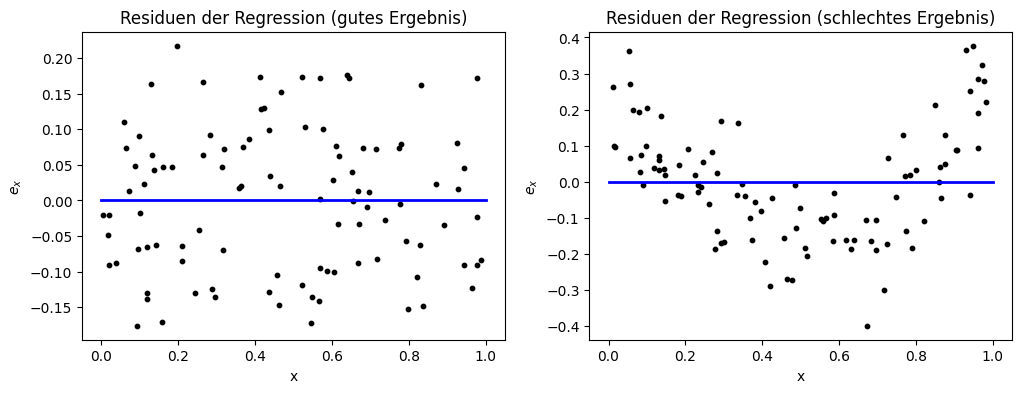

In [2]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Residuen der Regression (gutes Ergebnis)')
axes[0].scatter(X_lin, Y_lin-Y_lin_pred,  color='black', s=10)
axes[0].plot([0, 1],[0,0] , color='blue', linewidth=2)
axes[0].set_xlabel('x')
axes[0].set_ylabel('$e_x$')

axes[1].set_title('Residuen der Regression (schlechtes Ergebnis)')
axes[1].scatter(X_exp, Y_exp-Y_exp_pred,  color='black', s=10)
axes[1].plot([0, 1],[0,0] , color='blue', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('$e_x$')

plt.show()

Die Residuen haben eine ähnliche Aussagekraft wie die direkte Darstellung der Regression und der Daten. Der Vorteil bei den Residuen ist jedoch, dass nur der Fehler dargestellt wird, sodass der Fokus klarer ist. Bei der Darstellung des guten Ergebnisses auf der linken Seite könnte man irrtümlicherweise vermuten, dass das Ergebnis schlecht ist, da die Punkte in der vollen Fläche der Darstellung streuen und nicht unbedingt nah an der blauen Geraden liegen, die einen Fehler von 0 markiert. Wenn man einen Blick auf die y-Achse wirft, erkennt man aber, dass das Ergebnis eigentlich sehr gut ist, da der Datenbereich einfach sehr klein ist. Auf der rechten Seite sieht man beim schlechten Ergebnis, dass der Datenbereich auf der y-Achse beinahe 20-mal so groß ist. Dies ist bereits der erste Indikator dafür, dass es ein schlechtes Ergebnis ist. Außerdem erkennt man anhand der Residuen auch wieder gut das Muster aus Over- und Underprediction.

Unsere bisherigen Analysen funktionieren zwar sehr gut, aber nur dann, wenn es ein Merkmal gibt. Sobald es viele Merkmale gibt, kann man weder die Residuen noch die Daten mit der Regression gut darstellen. Wir können jedoch eine andere Art der Darstellung der Fehler wählen, die unabhängig von der Anzahl der Merkmale ist. Die Grundidee ist ähnlich zur Confusion Matrix, die wir aus [Kapitel 7](kapitel_07) kennen: Wir vergleichen die wahren Werte der abhängigen Variablen mit den Vorhersagen.

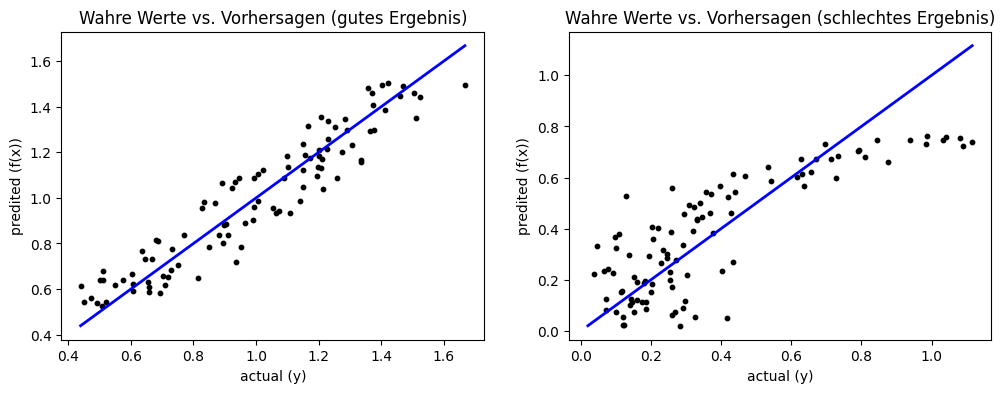

In [3]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Wahre Werte vs. Vorhersagen (gutes Ergebnis)')
axes[0].scatter(Y_lin, Y_lin_pred,  color='black', s=10)
axes[0].plot([np.min(np.minimum(Y_lin, Y_lin_pred)), np.max(np.maximum(Y_lin, Y_lin_pred))],[np.min(np.minimum(Y_lin, Y_lin_pred)), np.max(np.maximum(Y_lin, Y_lin_pred))] , color='blue', linewidth=2)
axes[0].set_xlabel('actual (y)')
axes[0].set_ylabel('predited (f(x))')

axes[1].set_title('Wahre Werte vs. Vorhersagen (schlechtes Ergebnis)')
axes[1].scatter(Y_exp, Y_exp_pred,  color='black', s=10)
axes[1].plot([np.min(np.minimum(Y_exp, Y_exp_pred)), np.max(np.maximum(Y_exp, Y_exp_pred))],[np.min(np.minimum(Y_exp, Y_exp_pred)), np.max(np.maximum(Y_exp, Y_exp_pred))] , color='blue', linewidth=2)
axes[1].set_xlabel('actual (y)')
axes[1].set_ylabel('predited (f(x))')

plt.show()

Im Idealfall entsprechen die Vorhersagen den wahren Werten. Dies ist in der Darstellung die blau markierte Diagonale. Je weiter die Instanzen von der Diagonale entfernt sind, desto schlechter ist die Regression. Für ein gutes Ergebnis sollten alle Instanzen relativ nah an der Diagonale liegen und es sollte kein Muster in der Streuung geben. Bei einem schlechten Ergebnis sind die Abweichungen größer und/oder es gibt Muster, die auf systematische Fehler hindeuten. Beim schlechten Ergebnis beobachten wir beides. Zum einen sehen die Werte kleiner als 0,35 nahezu zufällig aus und sind weit von der Diagonale entfernt. Zum anderen erkennen wir wieder das gleiche Muster wie bisher auch.

### Gütemaße

Es gibt auch Gütemaße für die Bewertung von Regressionen. Diese Gütemaße werden mithilfe der Residuen definiert. Sei hierfür $X = \{x_1, ..., x_n\} \subseteq \mathcal{F} \subseteq \mathbb{R}^m$ eine Stichprobe von Instanzen mit $m$ Merkmalen und $Y = \{y_i, ..., y_n\} \subseteq \mathbb{R}$ die Werte der dazugehörigen abhängigen Variablen. {numref}`tbl-metrics-regression` listet die Definition von vier Gütemaßen auf. 

```{table} Gütemaße für Regressionen
:name: tbl-metrics-regression

| Gütemaß | Beschreibung | Definition |
|--------|-------------|------------|
| Mean Absolute Error | Das arithmetische Mittel der Residuen, also die absolute Abweichung der Vorhersagen von den erwarteten Werten | $MAE = \frac{1}{n} \sum_{i=1}^n \vert e_{x_i} \vert$ |
| Mean Squared Error | Das arithmetische Mittel des Quadrats der Residuen | $MSE = \frac{1}{n} \sum_{i=1}^n e_{x_i}^2$ |
| R Squared, R2, $R^2$ | Das *Bestimmtheitsmaß*, definiert als der Anteil der Varianz der Daten, der durch die Regression erklärt wird.  | $R^2 = 1 - \frac{\sum_{i=1}^n (y_i-f(x_i))^2}{\sum_{i=1}^n (y_i-mean(Y))^2}$
| Adjusted R Squared | Variante von $R^2$, die die Komplexität der Regression berücksichtigt. | $\bar{R}^2 = 1 - (1-R^2)\frac{n-1}{n-m-1}$ |
```

MAE misst die absolute Abweichung der Vorhersagen von den erwarteten Werten. MSR ist ähnlich zu MAE, nutzt aber die quadratischen Distanzen. Da MSE die quadratischen Instanzen berücksichtigt, werden Ausreißer stärker bestraft als bei MAE. Sowohl MAE als auch MSE sind absolute Gütemaße und daher schwer zu interpretieren, da es keine festen Referenzpunkte gibt. Bei der Klassifikation waren die Gütemaße fast alle im Intervall $[0,1]$ verteilt, sodass eindeutig klar war, was das beste und schlechteste Ergebnis ist. Um MAE und MSE zu interpretieren, braucht man detailliertes Wissen über die abhängige Variable, insbesondere über den Wertebereich und die praktische Relevanz von Abweichungen.

In dieser Hinsicht ist $R^2$ ähnlicher zu den Gütemaßen für die Klassifikation: Die Werte liegen im Intervall $[0,1]$, wobei 1 der beste mögliche Wert ist. Mit $R^2$ kann man die Frage beantworten, ob eine Regression besser ist, als einfach nur das arithmetische Mittel der Daten als Schätzung von der abhängigen Variablen zu nutzen. Die Summe im Zähler entspricht der Summe der quadrierten Residuen. Der Nenner betrachtet sozusagen auch Residuen, nur dass das arithmetische Mittel als Regression genommen wird. Würde man Zähler und Nenner noch durch $n$ teilen, hätte man MSE als Zähler und die Varianz als Nenner. $R^2$ ist also das Verhältnis von MSE des Modells zur Varianz der abhängigen Variablen. Je kleiner MSR im Verhältnis zur Varianz ist, desto besser. Hierdurch berücksichtigt $R^2$ die Unsicherheit in den Daten.

Eine Schwäche von $R^2$ ist, dass Regressionen mit mehr Merkmalen eigentlich immer besser werden. Dies kann jedoch zu Overfitting führen. Adjusted $R^2$ berücksichtigt daher die Anzahl der Merkmale. Wenn die Verbesserung von $R^2$ durch eine Senkung von MSE kleiner ist als die Bestrafung durch mehr Merkmale, wird der Wert von Adjusted $R^2$ kleiner.  

Betrachten wir jetzt die Werte unserer Gütemaße für unsere zwei Beispiele. 

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def adjusted_r2_score(Y, Y_pred, n_instances, n_features):
    return (1-(1-r2_score(Y, Y_pred))*(n_instances-1)/(n_instances-n_features-1))

print('Gütemaße (gutes Ergebnis)')
print('MAE:         %.2f' % mean_absolute_error(Y_lin, Y_lin_pred))
print('MSE:         %.2f' % mean_squared_error(Y_lin, Y_lin_pred))
print('R2:          %.2f' % r2_score(Y_lin, Y_lin_pred))
print('Adjusted R2: %.2f' % adjusted_r2_score(Y_lin, Y_lin_pred, n, 1))
print()
print('Gütemaße (schlechtes Ergebnis)')
print('MAE:         %.2f' % mean_absolute_error(Y_exp, Y_exp_pred))
print('MSE:         %.2f' % mean_squared_error(Y_exp, Y_exp_pred))
print('R2:          %.2f' % r2_score(Y_exp, Y_exp_pred))
print('Adjusted R2: %.2f' % adjusted_r2_score(Y_exp, Y_exp_pred, n, 1))

Gütemaße (gutes Ergebnis)
MAE:         0.08
MSE:         0.01
R2:          0.89
Adjusted R2: 0.89

Gütemaße (schlechtes Ergebnis)
MAE:         0.13
MSE:         0.03
R2:          0.68
Adjusted R2: 0.68


Da wir zufällige Daten generiert haben, können wir die Werte von MAE und MSE nicht bewerten. Ohne den Wertebereich und die Bedeutung der abhängigen Variable zu kennen, hilft ein Wert von $MAE=0,08$ nicht weiter, um zu verstehen, wie gut eine Regression ist. Man erkennt lediglich, dass MAE und MSE beim guten Ergebnis niedriger sind als beim schlechten Ergebnis. Bitte beachten Sie, dass die Werte des MSE kleiner sind als bei MAE, da $x^2 < x$ für $x \in (0,1)$. Auch hier erkennt man wieder die Bedeutung des Wertebereichs für diese Gütemaße. 

Bei $R^2$ sehen wir, dass der Wert vom guten Ergebnis viel größer ist als beim schlechten Ergebnis. Das schlechte Ergebnis erklärt nur etwa zwei Drittel der Varianz, während das gute Ergebnis fast 90% erklärt. Bei Adjusted $R^2$ verhält es sich genauso, da es nur ein einziges Merkmal gibt. 

## Lineare Regression

Die lineare Regression ist uns bereits in [Kapitel 7](kapitel_07) als Teil der logistischen Regression begegnet sowie im obigen Beispiel. Jetzt wollen wir die lineare Regression genauer betrachten. Die Formel für die Regressionsfunktion der linearen Regression ist

$$y = b_0 + b_1x_1 + ... + b_mx_m = b_0 + \sum_{i=1}^m b_ix_i$$

mit den *Koeffizienten* $b_1, ..., b_m \in \mathbb{R}$ und dem *Achsenabschnitt* (engl. *intercept*) $b_0$. Die Koeffizienten definieren den Einfluss der Merkmale auf die abhängige Variable. Dies ist ähnlich zur Korrelation und damit auch direkt verwandt. Ein positiver Koeffizient bedeutet, dass ein Merkmal positiv mit der abhängigen Variablen korreliert ist. Ein negativer Koeffizient heißt, dass es eine negative Korrelation gibt. Es existieren jedoch auch Ausnahmen, wie wir in den nächsten Abschnitten sehen werden.

Der Achsenabschnitt ist der "Basiswert" der abhängigen Variablen, also der Wert, wenn alle Merkmale gleich null wären. Geometrisch betrachtet ist das der Schnittpunkt mit den Achsen des Koordinatensystems.

Ein wichtiger Aspekt der linearen Regression ist, wie die Koeffizienten und der Achsenabschnitt bestimmt werden. Dies hat nicht nur Auswirkungen auf die Qualität der Regression, sondern auch auf die Interpretation der Koeffizienten.

### Ordinary Least Squares (OLS)

Das übliche Verfahren zum Berechnen der Koeffizienten einer linearen Regression ist die Methode der kleinsten Quadrate, bekannt als *Ordinary Least Squares* (OLS). Hierfür interpretieren wir die Instanzen als Matrix und die abhängige Variable als Vektor: 

$$
\begin{split}
X &= \begin{pmatrix}
x_{1,1} & \dots & x_{1,m} \\
\vdots & \ddots & \vdots \\
x_{n,1} & \dots & x_{n,m} 
\end{pmatrix} \\
y &= (y_1, \dots, y_n) \\
b &= (b_1, \dots, b_m)
\end{split}
$$

Mit dieser Repräsentation können wir die Vorhersagen für alle Instanzen gleichzeitig als Matrixoperation berechnen, sodass

$$f(X) = b_0 + Xb.$$

Da wir die Residuen minimieren wollen, können wir dies als Optimierungsproblem formulieren. Hierzu müssen wir nur die wahren Werte von den Vorhersagen abziehen und dann den quadratischen Fehler berechnen: 

$$\min ||f(X) - f^*(X)||_2^2 = \min ||b_0 + Xb - y||_2^2.$$

Wir minimieren also das Quadrat der euklidischen Distanz, die wir in [Kapitel 6](kapitel_06) betrachtet haben. Wir suchen also eine Lösung, die die *kleinsten Quadrate* findet. 

Da wir in der Regel mehr Instanzen als Merkmale haben (andernfalls hat man meistens zu viele Merkmale), gibt es viele mögliche Lösungen für dieses Optimierungsproblem. Alle diese Lösungen haben die gleiche Güte, aber unterschiedliche Koeffizienten. Wenn die Koeffizienten korreliert sind, kann dies zu interessanten Effekten führen. 

Betrachten wir zwei Merkmale $x_1, x_2$ und eine abhängige Variable $y$, sodass $y = x_1 = x_2$. Die folgenden vier Lösungen sind alle optimal:

- Lösung 1: $b_0 = 0, b_1=0.5, b_2=0.5$
- Lösung 2: $b_0 = 0, b_1=1, b_2=0$
- Lösung 3: $b_0 = 0, b_1=0, b_2=1$
- Lösung 4: $b_0 = 0, b_1=10000, b_2=-9999$

Im Allgemeinen ist in diesem Fall jede Lösung, für die gilt $b_0=0$ und $b_1+b_2=1$, optimal. Die ersten drei Lösungen sehen vernünftig aus, führen aber zu sehr unterschiedlichen Interpretationen der Koeffizienten. Bei Lösung 2 könnte man denken, dass es keine Beziehung zwischen $x_2$ und $y$ gibt, bei Lösung 3 ist es genau anders, hier gibt es scheinbar eine sehr starke Beziehung. Dies zeigt, wie die Koeffizienten irreführend sein können. Da $b_1$ und $b_2$ jeden beliebigen Wert annehmen können, könnte wir für beide Merkmale beliebige "Korrelationen" finden.

### Ridge

Im Folgenden zeigen wir, wie man OLS abwandeln kann, um die Ergebnisse zu *regularisieren*. Durch die Regularisierung kann man extreme Koeffizienten verhindern, auch wenn die Merkmale korreliert sind. Die Idee ist einfach: Wenn ein Optimierungsproblem viele optimale Lösungen hat, benötigen wir einfach ein zusätzliches Kriterium, mit dem wir die Lösungen auswählen, die uns besser gefallen. Hierzu fügt man einfach einen *Regularisierungsterm* zur OLS-Formel hinzu.

Bei der *Ridge*-Regularisierung ist es das Ziel, möglichst kleine Werte für die Koeffizienten zu bekommen und dadurch extreme Werte durch Korrelationen zu verhindern. Wir müssen also das Optimierungsproblem so verändern, dass wir neben der Güte der Regression auch noch die Größe der Koeffizienten optimieren:


$$\min ||b_0 + Xb - y||_2^2 + \alpha ||b||_2^2,$$

wobei $\alpha \in \mathbb{R}, \alpha>0$ die Stärke der Regularisierung bestimmt und $||b||_2^2 = \sqrt{\sum_{i=1}^m b_i^2}^2 = \sum_{i=1}^m b_i^2$ nichts anderes als die Summe der Quadrate der Koeffizienten ist. Bei unseren vier Lösungen von oben, würden wir folgende Werte für $||b||_2^2$ erhalten:

- Lösung 1: $||b||_2^2 = 0.5^2+0.5^2 = 0,5$
- Lösung 2/3: $||b||_2^2 = 1^2+0^2 = 1,0$
- Lösung 4: $||b||_2^2 = 10000^2+(-9999)^2 = 199980001$

Mit der Ridge-Regularisierung würden wir also die erste Lösung auswählen. 

### Lasso

Ein weiteres Regularisierungsverfahren ist *Lasso*. Obwohl Ridge die absoluten Werte der Koeffizienten minimiert, sind die Werte häufig nicht null. Eine Regression, die eine ähnliche Güte mit weniger Merkmalen erreicht, ist aber oft besser, da die Gefahr von Overfitting reduziert wird. Das Ziel der Lasso-Regularisierung ist es, die Koeffizienten nicht nur zu minimieren, sondern dafür zu sorgen, dass sie exakt null werden. Hierzu modifizieren wir auch wieder das OLS-Optimierungsproblem:

$$\min ||b_0 + Xb - y||_2^2 + \alpha ||b||_1$$


Der Unterschied zu Ridge ist, dass wir jetzt $||b||_1 = \sum_{i=1}^m |b_i|$ als Regularisierungsterm benutzen, also die Manhattan-Norm statt der euklidischen Norm. Auf unsere Lösungen wirkt sich das wie folgt aus:

- Lösung 1: $||b||_1 = |0.5|+|0.5| = 1,0$
- Lösung 2/3: $||b||_1 = |1|+|0| = 1,0$
- Lösung 4: $||b||_1 = |10000|+|-9999| = 19999$

Die Lösungen 1, 2 und 3 sind also optimal mit Lasso, es gibt eine hohe Wahrscheinlichkeit, dass eine Lösung gewählt wird, bei der ein Koeffizient exakt null ist.

> **Bemerkung:**
>
> Wir überspringen an dieser Stelle die mathematische Begründung, warum Ridge nur die Koeffizienten minimiert, sie aber bei Lasso genau null werden. Verkürzt kann man sagen, dass es an den Bedingungen des Optimierungsproblems liegt. Die geometrische Form dieser Bedingungen ist ein Kreis bei Ridge und eine Raute bei Lasso, da dies die Form der Einheitskreise der euklidischen bzw. Manhattan-Norm ist. Aufgrund der Rautenform, die ihre Spitzen auf den Achsen hat, werden die Koeffizienten mit hoher Wahrscheinlichkeit genau null. Eine vollständige Erklärung findet man zum Beispiel hier [^lasso-ridge].

### Elastic Net

Die letzte Regularisierungsvariante, die wir hier betrachten wollen, ist das *Elastic Net*, das Ridge und Lasso kombiniert: 

$$\min ||b_0 + Xb - y||_2^2 + \rho \alpha ||b||_1 + \frac{1-\rho}{2}\alpha ||b||_2^2$$

$\rho \in [0,1]$  definiert die Gewichtung von Ridge und Lasso. Mit $\rho=0$ hätten wir Ridge, mit $\rho=1$ hätten wir Lasso. Mit dem Elastic Net kann man niedrige Koeffizienten erzwingen, die nach Möglichkeit null werden. 

### Auswirkung der Regularisierung

Um die Auswirkungen der Regularisierung zu untersuchen, betrachten wir noch einmal die Bostondaten, die wir bereits aus [Kapitel 4](kapitel_04) kennen, und erstellen jetzt eine lineare Regression für die Daten. Wir vergleichen die Ergebnisse von OLS, Ridge, Lasso und dem Elastic Net. Wir nutzen eine Regularisierungsstärke von $\alpha=0,5$ und ein Gewicht von $\rho=0,25$ für das Verhältnis von Ridge und Lasso beim Elastic Net. Balkendiagramme sind ein gutes Hilfsmittel, um die Veränderung der Koeffizienten zu betrachten.

[^lasso-ridge]: https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

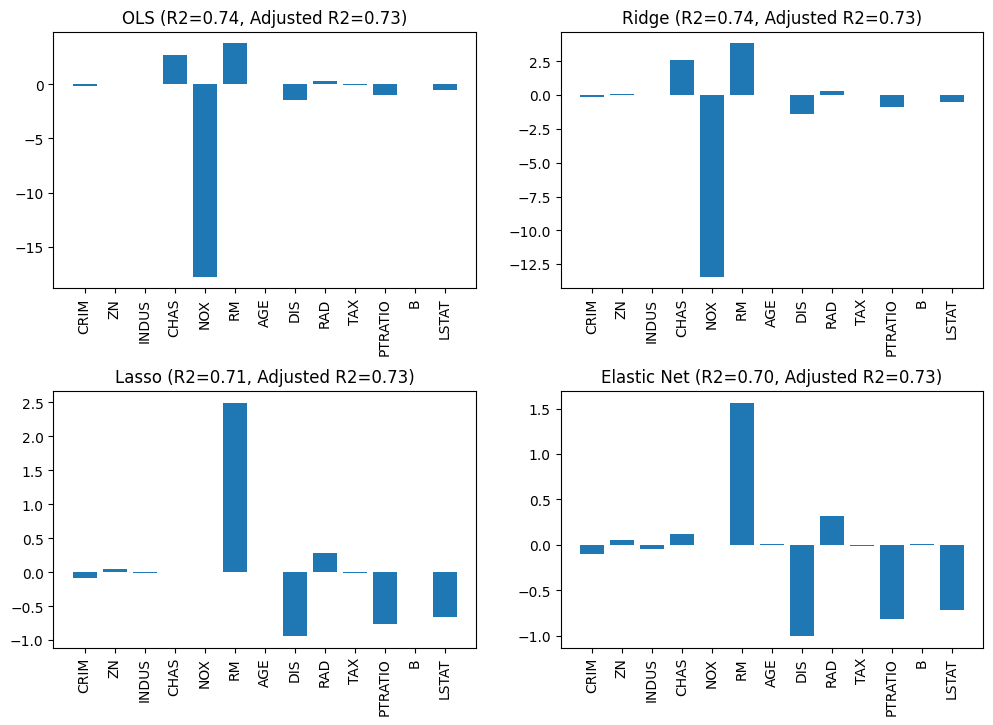

In [5]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, ElasticNet

boston = datasets.fetch_openml(data_id=531, parser='auto')
predictors = boston.feature_names
X_boston=boston.data.astype('float64')
Y_boston=boston.target

alpha = 0.5

# OLS linear regression
ols = LinearRegression()
ols.fit(X_boston, Y_boston)
Y_ols = ols.predict(X_boston)

ridge = Ridge(alpha=alpha)
ridge.fit(X_boston, Y_boston)
Y_ridge = ridge.predict(X_boston)

lasso = Lasso(alpha=alpha)
lasso.fit(X_boston, Y_boston)
Y_lasso = lasso.predict(X_boston)

elastic = ElasticNet(alpha=alpha, l1_ratio=0.25)
elastic.fit(X_boston,Y_boston)
Y_elastic = elastic.predict(X_boston)

fig, axes = plt.subplots(2,2, figsize=(12,7))
axes[0,0].set_title('OLS (R2=%.2f, Adjusted R2=%.2f)' % (r2_score(Y_boston, Y_ols), adjusted_r2_score(Y_boston, Y_ols, len(Y_boston), sum(ols.coef_!=0))))
axes[0,0].bar(predictors, ols.coef_)
axes[0,0].tick_params(axis='x', labelrotation=90)

axes[0,1].set_title('Ridge (R2=%.2f, Adjusted R2=%.2f)' % (r2_score(Y_boston, Y_ridge), adjusted_r2_score(Y_boston, Y_ols, len(Y_boston), sum(ridge.coef_!=0))))
axes[0,1].bar(boston.feature_names, ridge.coef_)
axes[0,1].tick_params(axis='x', labelrotation=90)

axes[1,0].set_title('Lasso (R2=%.2f, Adjusted R2=%.2f)' % (r2_score(Y_boston, Y_lasso), adjusted_r2_score(Y_boston, Y_ols, len(Y_boston), sum(lasso.coef_!=0))))
axes[1,0].bar(boston.feature_names, lasso.coef_)
axes[1,0].tick_params(axis='x', labelrotation=90)

axes[1,1].set_title('Elastic Net (R2=%.2f, Adjusted R2=%.2f)' % (r2_score(Y_boston, Y_elastic), adjusted_r2_score(Y_boston, Y_ols, len(Y_boston), sum(elastic.coef_!=0))))
axes[1,1].bar(boston.feature_names, elastic.coef_)
axes[1,1].tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.4)
plt.show()

Man sieht bereits einen sehr starken Effekt durch die Regularisierung. Das Merkmal NOX hat den absolut größten Koeffizienten und die Änderung zwischen den Regularisierungen ist sehr groß. Mit OLS ist der Wert von NOX bei ca. -18, mit Ridge nur noch bei ca. -13 und mit Lasso und dem Elastic Net wird der Koeffizient sogar auf null gesetzt. Bei Ridge ändert sich der $R^2$-Wert nicht gegenüber OLS, obwohl es eine derart große Änderung der Koeffizienten gibt. Bei Lasso werden neben NOX auch noch CHAS auf null gesetzt. Obwohl vier Merkmale entfernt wurden, ändert sich der $R^2$-Wert nur leicht. Dadurch dass es weniger Merkmale sind, hat sich Adjusted $R^2$ nicht verändert. Man sieht auch, dass mit dem Elastic Net weniger Merkmale auf null gesetzt werden als mit Lasso.

Insgesamt erkennt man einen starken Einfluss der Regularisierung auf die Koeffizienten und auch, dass gerade NOX scheinbar nicht so relevant ist, wie es ohne Regularisierung erscheint. Dennoch sollte man Regularisierung mit Bedacht einsetzen. Wenn man einen zu hohen Wert für die Regularisierungsstärke wählt, kann es sein, dass der Fokus des Optimierungsproblems nicht mehr auf einer guten Regression liegt, weil kleine Werte der Koeffizienten zu wichtig sind. Betrachten wir noch einmal das gleiche Beispiel mit $\alpha=5$, also einer zehnmal stärkeren Regularisierung. 

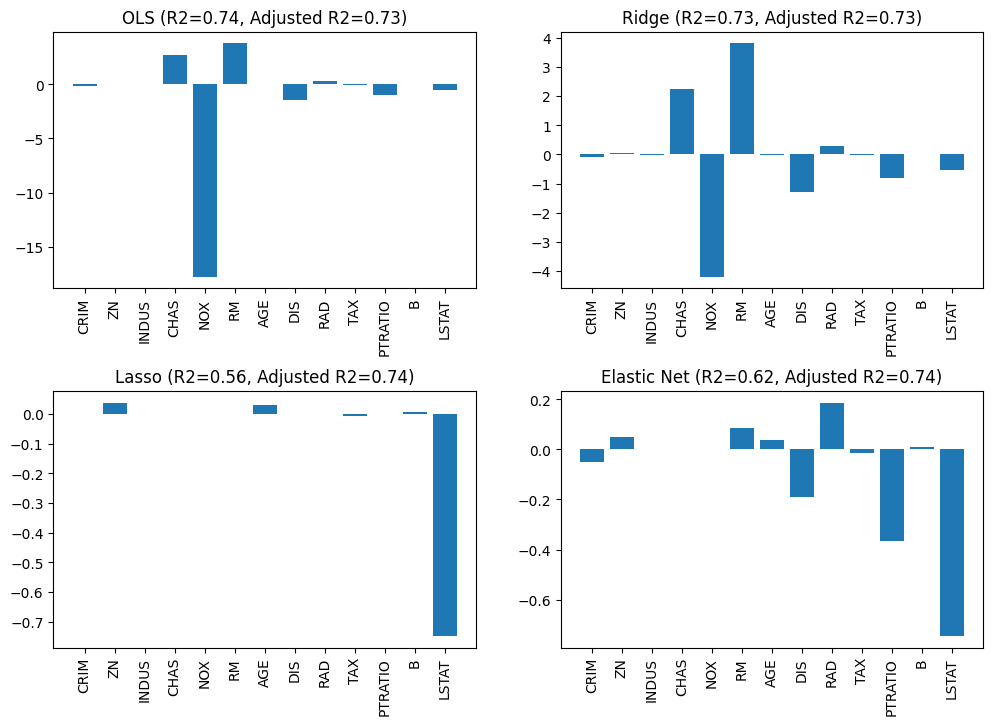

In [6]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, ElasticNet

boston = datasets.fetch_openml(data_id=531, parser='auto')
predictors = boston.feature_names
X_boston=boston.data.astype('float64')
Y_boston=boston.target

alpha = 5

# OLS linear regression
ols = LinearRegression()
ols.fit(X_boston, Y_boston)
Y_ols = ols.predict(X_boston)

ridge = Ridge(alpha=alpha)
ridge.fit(X_boston, Y_boston)
Y_ridge = ridge.predict(X_boston)

lasso = Lasso(alpha=alpha)
lasso.fit(X_boston, Y_boston)
Y_lasso = lasso.predict(X_boston)

elastic = ElasticNet(alpha=alpha, l1_ratio=0.25)
elastic.fit(X_boston,Y_boston)
Y_elastic = elastic.predict(X_boston)

fig, axes = plt.subplots(2,2, figsize=(12,7))
axes[0,0].set_title('OLS (R2=%.2f, Adjusted R2=%.2f)' % (r2_score(Y_boston, Y_ols), adjusted_r2_score(Y_boston, Y_ols, len(Y_boston), sum(ols.coef_!=0))))
axes[0,0].bar(predictors, ols.coef_)
axes[0,0].tick_params(axis='x', labelrotation=90)

axes[0,1].set_title('Ridge (R2=%.2f, Adjusted R2=%.2f)' % (r2_score(Y_boston, Y_ridge), adjusted_r2_score(Y_boston, Y_ols, len(Y_boston), sum(ridge.coef_!=0))))
axes[0,1].bar(boston.feature_names, ridge.coef_)
axes[0,1].tick_params(axis='x', labelrotation=90)

axes[1,0].set_title('Lasso (R2=%.2f, Adjusted R2=%.2f)' % (r2_score(Y_boston, Y_lasso), adjusted_r2_score(Y_boston, Y_ols, len(Y_boston), sum(lasso.coef_!=0))))
axes[1,0].bar(boston.feature_names, lasso.coef_)
axes[1,0].tick_params(axis='x', labelrotation=90)

axes[1,1].set_title('Elastic Net (R2=%.2f, Adjusted R2=%.2f)' % (r2_score(Y_boston, Y_elastic), adjusted_r2_score(Y_boston, Y_ols, len(Y_boston), sum(elastic.coef_!=0))))
axes[1,1].bar(boston.feature_names, elastic.coef_)
axes[1,1].tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.4)
plt.show()

Bei Ridge werden lediglich die Werte der Koeffizienten weiter reduziert, ohne dass sich der $R^2$-Wert stark verändert. Das spricht dafür, dass der höhere Wert von $\alpha$ für Ridge besser ist. Bei Lasso und dem Elastic Net hat sich der $R^2$-Wert hingegen stark reduziert, weil deutlich mehr Merkmale auf null gesetzt werden. Die Regression ist also insgesamt schlechter. Das Verhältnis von Modellkomplexität und Güte der Regression ist jedoch unverändert: Adjusted $R^2$ ist immer noch gut. Hier hat man also die Wahl: Will man eine bessere, aber auch komplexere Regression oder einfachere Regression mit weniger Merkmalen, die jedoch eine geringere Güte aufweist.

## Jenseits von linearer Regression

Lineare Regression ist natürlich nicht die einzige Möglichkeit, um Regressionsprobleme zu lösen und gerade für komplexe Beziehungen zwischen den Merkmalen und der abhängigen Variablen in der Regel auch nicht ausdrucksstark genug. Mit Ausnahme von Naive Bayes gibt es für alle Klassifikationsalgorithmen aus [Kapitel 7](kapitel_07) einen ähnlichen Algorithmus für die Regression: $k$-Nearest Neighbor Regression, Regression Trees, Random Forest Regression und Support Vector Regression. Der Ansatz bleibt der gleiche, nur dass einige Details für die Regression angepasst werden müssen. Bei Entscheidungsbäumen wird zum Beispiel die Varianz benutzt, um den Informationsgehalt zu schätzen. Neuronale Netzwerke lösen ohnehin schon ein Regressionsproblem, hier muss man einfach die abhängige Variable als Output Layer modellieren.

## Übung

In dieser Übung vertiefen wir die Regression. Hierzu vergleichen wir die Varianten der linearen Regression auf einem Datensatz und bewerten die Güte. Außerdem versuchen wir, die Modelle anhand der Koeffizienten zu verstehen. Als Daten verwenden wir wieder Hauspreise, nur diesmal aus Kalifornien [^california].

### Trainings- und Testdaten

Laden Sie die Daten. Teilen Sie die Daten so auf, dass Sie 50% der Daten zum Training und 50% der Daten zum Testen verwenden. 

### Trainieren, Testen, Bewerten

Benutzen Sie die verschiedenen Varianten der linearen Regression, um ein Modell der Hauspreise zu erstellen. Was sind die Unterschiede zwischen OLS/Ridge/Lasso/Elastic Net? Finden Sie gute Werte für die Stärke der Regularisierung. Untersuchen Sie, wie sich die Güte, gemessen mit $R^2$ und Adjusted $R^2$, auf den Testdaten verändert. Visualisieren Sie die Koeffizienten als Balkendiagramme, um die Modelle und die Auswirkung der Regularisierung zu verstehen.

### Nichtlineare Regression

Verwenden Sie eines der Modelle, die wir zum Abschluss des Kapitels genannt haben, zum Beispiel eine Random Forest Regression. Vergleichen Sie die Güte mit den linearen Modellen.

[^california]: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing